$\frac{\Delta F}{F} = \frac{\text{fl. at point} - \text{baseline}}{\text{baseline}}$

**Goals:**
* time between bursts
* number of spikes within burst
* average burst amplitude 
* area under burst
* time between major bursts

**Ideas:**
* detect change in slope to find rising edge, falling edge of burst

# Scratch work

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.signal import find_peaks, peak_widths, peak_prominences

In [2]:
plt.rcParams['figure.figsize'] = [20, 5]

This data has subspikes

In [3]:
fname = '221221 Calcium Imaging Bicc and Control.xlsx'
df = pd.read_excel(io=fname, sheet_name='4AP 1')

In [4]:
dftest = pd.read_excel(io=fname,sheet_name=None)

In [5]:
k = dftest.keys()

In [6]:
len(dftest['Bicc 1'])

1504

In [7]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,1.0,396.167,295.686,316.75,118.484,137.429,67.731,16.431,NaN,...,NaN,NaN,1.0,411.400,268.784,335.80,94.323,174.929,58.997,17.379
1,NaN,2.0,407.983,281.235,336.60,99.516,157.071,67.106,17.483,NaN,...,NaN,NaN,2.0,422.250,268.353,303.45,82.194,211.143,59.059,17.741
2,NaN,3.0,402.817,271.059,287.95,129.710,122.857,67.533,14.759,NaN,...,NaN,NaN,3.0,412.600,290.804,297.05,93.774,192.214,59.056,18.328
3,NaN,4.0,431.567,254.510,328.80,121.355,120.357,67.527,19.000,NaN,...,NaN,NaN,4.0,421.583,247.176,271.70,94.419,193.857,59.196,16.948
4,NaN,5.0,400.167,280.118,332.60,110.806,125.071,67.108,17.741,NaN,...,NaN,NaN,5.0,419.100,263.627,293.80,83.935,181.643,59.039,16.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,NaN,1500.0,409.517,273.176,308.05,94.129,194.571,66.882,17.483,NaN,...,NaN,NaN,1500.0,407.817,237.314,285.65,67.194,252.500,57.039,17.052
1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.tail(1).index[0]

1503

In [31]:
df.keys()

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

In [32]:
xs = df['Unnamed: 1'][:1500].to_numpy()
ys = df['Unnamed: 7'][:1500].to_numpy()

In [33]:
len(df['Unnamed: 7'])

1504

In [34]:
df['Unnamed: 7']

0       67.731
1       67.106
2       67.533
3       67.527
4       67.108
         ...  
1499    66.882
1500       NaN
1501       NaN
1502       NaN
1503    56.464
Name: Unnamed: 7, Length: 1504, dtype: float64

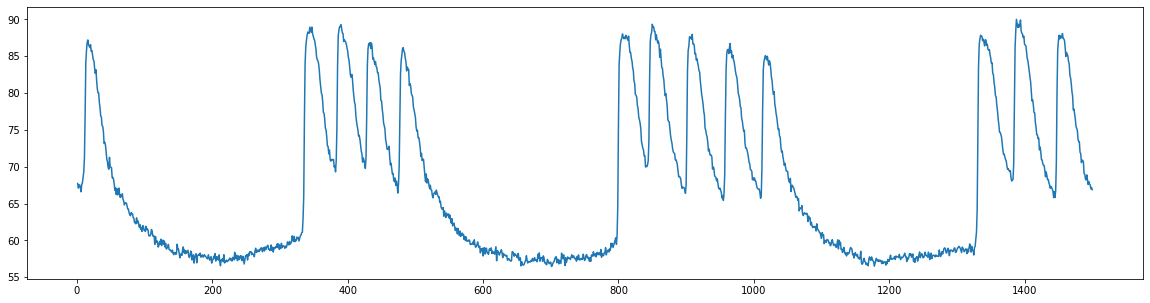

In [35]:
plt.plot(xs,ys)

Now create $\Delta F/F$ 

In [36]:
Fmin = np.min(ys)
deltaF = np.fromiter(((i-Fmin)/Fmin for i in ys),float)
# plot
idx = np.isfinite(xs) & np.isfinite(deltaF)

Now find peaks and plot

In [37]:
peaks, _ = find_peaks(deltaF, height=0.2, width=5)

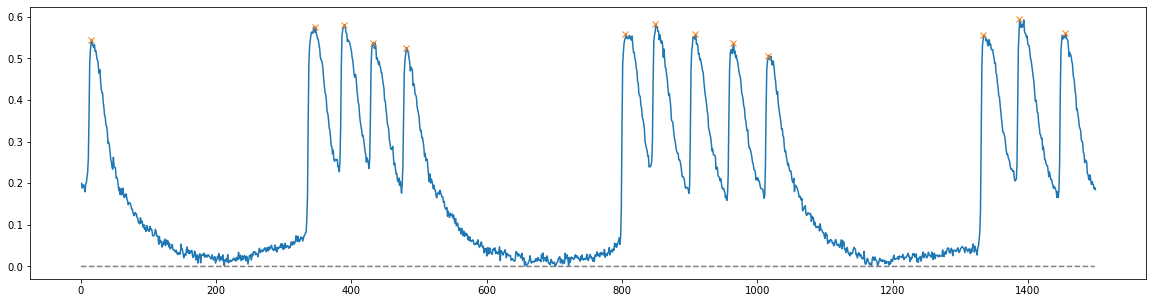

In [38]:
plt.plot(xs, deltaF)
plt.plot(peaks, deltaF[peaks], "x")
plt.plot(np.zeros_like(xs), "--", color="gray")

In [39]:
len(peaks)

13

In [40]:
peaks

array([  15,  346,  389,  432,  481,  805,  849,  908,  964, 1016, 1334,
       1387, 1455])

Now, find peak prominences

In [117]:
prominences = peak_prominences(deltaF, peaks, wlen=100)
prominences

(array([0.36509989, 0.34811561, 0.34560074, 0.30244049, 0.34976268,
        0.31986753, 0.34306815, 0.38222584, 0.3721132 , 0.34306815,
        0.35029399, 0.38858388, 0.37556673]),
 array([   5,  298,  381,  425,  473,  758,  839,  898,  954, 1009, 1288,
        1380, 1442]),
 array([  63,  381,  425,  473,  525,  839,  898,  954, 1009, 1066, 1380,
        1437, 1499]))

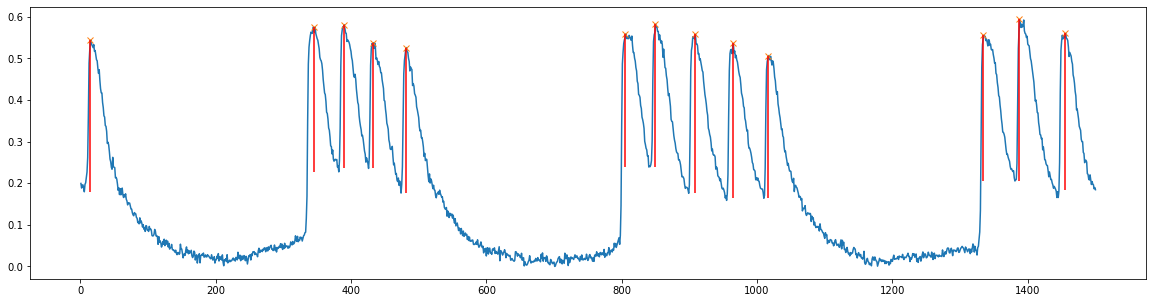

In [118]:
contour_heights = deltaF[peaks] - prominences[0] # have to choose the first array returned from peak_prominences
plt.plot(xs, deltaF)
plt.plot(peaks, deltaF[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights, ymax=deltaF[peaks], colors='red')
plt.show()

In [120]:
results_half = peak_widths(deltaF, peaks, prominence_data=prominences, rel_height=0.5)
results_full = peak_widths(deltaF, peaks, prominence_data=prominences, rel_height=1)

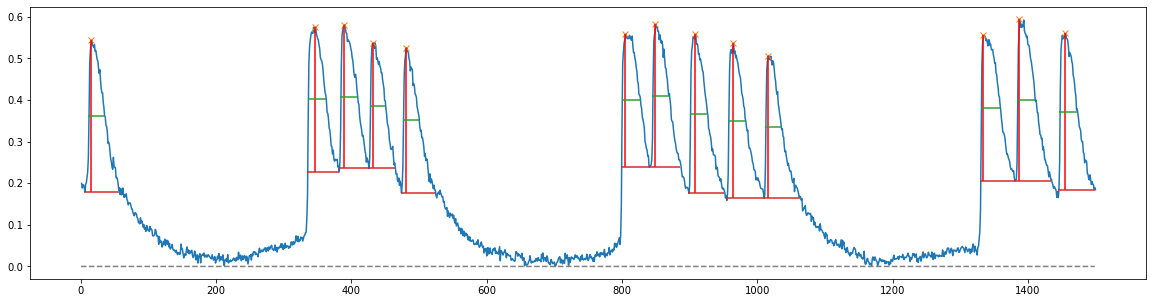

In [126]:
contour_heights = deltaF[peaks] - prominences
plt.plot(xs, deltaF)
plt.plot(peaks, deltaF[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights[0], ymax=deltaF[peaks], colors='red')
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.plot(np.zeros_like(xs), "--", color="gray")
plt.show()

In [110]:
contour_heights

array([0.17945948, 0.22738382, 0.23560145, 0.23560145, 0.17634245,
       0.2391081 , 0.2391081 , 0.17577572, 0.16387433, 0.16387433,
       0.20544063, 0.20544063, 0.18450694])

In [111]:
deltaF[peaks]

array([0.54455937, 0.57549943, 0.58120218, 0.53804194, 0.52610513,
       0.55897563, 0.58217625, 0.55800156, 0.53598753, 0.50694248,
       0.55573463, 0.59402451, 0.56007368])

In [113]:
results_full

(array([ 51.59219089,  46.67681977, 443.98104693,  38.95855615,
         50.54861111,  40.52271285, 476.51315789,  53.12727273,
        111.14874552,  54.40315315,  50.58301239, 112.81680025,
         53.9678179 ]),
 array([0.17945948, 0.22738382, 0.00164707, 0.23560145, 0.17634245,
        0.2391081 , 0.00065528, 0.17577572, 0.15879144, 0.16387433,
        0.20544063, 0.16566308, 0.18450694]),
 array([   5.        ,  334.32318023,  211.        ,  425.        ,
         473.        ,  798.47728715,  700.48684211,  898.        ,
         954.        , 1009.        , 1329.41698761, 1329.18319975,
        1445.0321821 ]),
 array([  56.59219089,  381.        ,  654.98104693,  463.95855615,
         523.54861111,  839.        , 1177.        ,  951.12727273,
        1065.14874552, 1063.40315315, 1380.        , 1442.        ,
        1499.        ]))

In [52]:
results_full[2]

array([   5.        ,  334.32318023,  211.        ,  425.        ,
        473.        ,  798.47728715,  700.48684211,  898.        ,
        954.        , 1009.        , 1329.41698761, 1329.18319975,
       1445.0321821 ])

In [53]:
results_full[3]

array([  56.59219089,  381.        ,  654.98104693,  463.95855615,
        523.54861111,  839.        , 1177.        ,  951.12727273,
       1065.14874552, 1063.40315315, 1380.        , 1442.        ,
       1499.        ])

# Object oriented analyzer

In [61]:
f = '221221 Calcium Imaging Bicc and Control.xlsx'
t = pd.read_excel(f,sheet_name=None)

In [62]:
t.keys()

dict_keys(['Bicc 1', 'Bicc 2', '4AP 1', '4AP 2', '4AP 3', 'Control 1', 'Control 2', 'Control 3'])

In [109]:
class analyzer:
    def __init__(self, inFile, sheet_name):
        '''Analyzer class for calcium imaging analysis
        Args:
            inFile : str
                path to input file, with extension. Allowed types: .xlsx
            sheet_name : str | int 
                Strings are used for sheet names. Integers are used in zero-indexed
                sheet positions (chart sheets do not count as a sheet position).
        '''
        # Check that we are only looking at one sheet
        if ((type(sheet_name)!=str) and (type(sheet_name)!=int)):
            raise ValueError('Argument "sheet_name" must either be string or integer.')
            
        # Store the dataframe of the given sheet and relevant information
        self.df = pd.read_excel(io=inFile, sheet_name=sheet_name)
        print("Available columns are:")
        print(*self.df.keys(),sep=', ')

In [107]:
analyzer(f,'Bicc 1')

Available columns are:
Unnamed: 0, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10, Unnamed: 11, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, 1, 358.821, 259.087, 240.952, 439.795, 320.265, 149.379, 17.797


# testing on Itzy data

First, load the entire spreadsheet as a dataframe with all sheets

In [127]:
f='Itzy_Calcium_Imaging.xlsx'
testdf = pd.read_excel(f,sheet_name=None)

In [129]:
testdf.keys()

dict_keys(['Control 1', 'Control 2', 'Control 3', 'Glial 2', 'Glial 3', 'Glial 1'])

Now, just load one sheet, e.g., `Glial 2`

In [236]:
df = pd.read_excel(f,sheet_name='Glial 2')

The keys of this dataframe are then the columns in the spreadsheet

**ideally, column names and lengths would be standardized**

In [237]:
df.keys()

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In this case, column `Unnamed: 1` is the time information (in frames)

In [238]:
df['Unnamed: 1']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
4499    1500.0
4500       NaN
4501       NaN
4502       NaN
4503       NaN
Name: Unnamed: 1, Length: 4504, dtype: float64

Now, convert the time information to be our X-axis and fluorescence information to be our Y-axis. 

**In this case, we're taking the `Unnamed: 7` column to be the data from a cell**

In [264]:
#xs = df['Unnamed: 1'][:1500].to_numpy()
xs = np.linspace(0,4501,4500)
ys = df['Unnamed: 7'][:4500].to_numpy()

Now calculate $F_{min}$ as the minimum (baseline) value seen in Fluorescence. We then calculate 

$$\frac{\Delta F}{F} = \frac{\text{fl. at point} - \text{baseline}}{\text{baseline}}$$

and remove any `NaN`s via boolean masking, i.e., storing the locations of `NaN`s in both the frame data and deltaF data and applying that mask to the deltaF data

In [293]:
Fmin = np.min(ys)
if Fmin==0.0: print("WARNING - Fmin is zero")
deltaF = np.fromiter(((i-Fmin)/Fmin for i in ys),float)
# plot
idx = np.isfinite(xs) & np.isfinite(deltaF)

We now find the peaks, prominences, and width values at full and half height in the `deltaF` data.

**Will write explanation of algorithm later**

In [294]:
peaks, _ = find_peaks(deltaF[idx], height=0.2, width=5)

In [295]:
prominences = peak_prominences(deltaF[idx], peaks, wlen=500)

In [271]:
results_half = peak_widths(deltaF, peaks, prominence_data=prominences, rel_height=0.5)
results_full = peak_widths(deltaF, peaks, prominence_data=prominences, rel_height=1)

Now we can plot the data

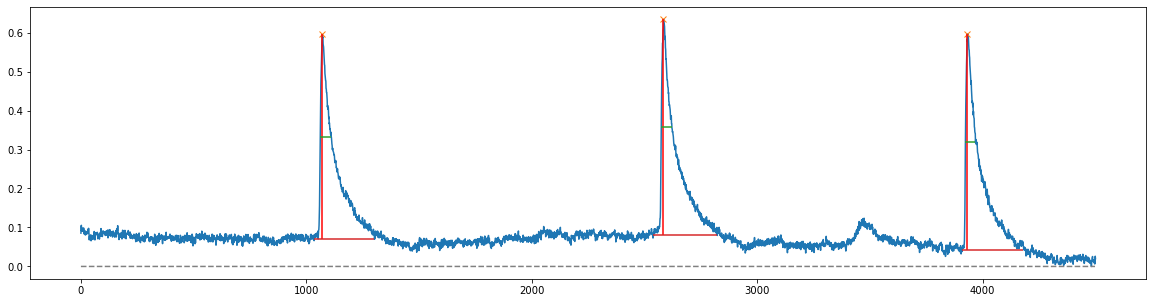

In [272]:
contour_heights = deltaF[peaks] - prominences
plt.plot(xs, deltaF)
plt.plot(peaks, deltaF[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights[0], ymax=deltaF[peaks], colors='red')
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.plot(np.zeros_like(xs), "--", color="gray")
plt.show()

# Dowlette Correlation matrix studies

In [275]:
#load in the data for cell correlation plot
cell1 = df['Unnamed: 2'][:4500].to_numpy()
cell2 = df['Unnamed: 3'][:4500].to_numpy()
cell3 = df['Unnamed: 4'][:4500].to_numpy()
cell4 = df['Unnamed: 5'][:4500].to_numpy()
cell5 = df['Unnamed: 6'][:4500].to_numpy()


In [284]:
cells = df.loc[:,'Unnamed: 2':'Unnamed: 6'][:4500]
cells

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,106.793,179.838,283.000,119.179,84.190
1,108.367,211.514,252.438,114.393,105.786
2,110.340,178.351,306.812,124.214,109.214
3,107.413,161.000,347.688,111.214,96.810
4,106.957,173.595,287.812,124.036,101.190
...,...,...,...,...,...
4495,76.657,81.595,68.875,80.214,42.357
4496,74.617,91.351,72.375,72.607,40.857
4497,73.910,88.514,85.750,74.964,57.095
4498,75.523,80.243,71.812,72.893,48.048


In [285]:
cells.corr()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
Unnamed: 2,1.000000,0.874207,0.826359,0.729836,0.839970
Unnamed: 3,0.874207,1.000000,0.865765,0.672177,0.850978
Unnamed: 4,0.826359,0.865765,1.000000,0.567204,0.847572
Unnamed: 5,0.729836,0.672177,0.567204,1.000000,0.637827
Unnamed: 6,0.839970,0.850978,0.847572,0.637827,1.000000


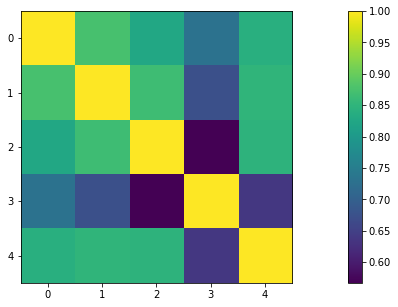

In [291]:
plt.imshow(cells.corr())
plt.colorbar()